In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('diabetic_prediction_dataset_v2.csv')

In [4]:
df

,Diabetes_Status,Diet_Quality,Physical_Activity_Level,Smoking_Status,Family_History,Glucose_Level,Insulin_Level,BMI,Age,HbA1c
0,0,Good,Moderate,Current Smoker,Yes,81.512847,1.637218,29.918798,22,6.434641912216784
1,0,Good,High,Current Smoker,No,107.371667,12.784553,30.160025,57,Unknown
2,1,Good,High,Non-Smoker,Yes,141.782099,28.219859,25.802436,35,10.056928347439266
3,1,Poor,Low,Former Smoker,No,186.950405,20.350001,36.065222,38,Unknown
4,0,Good,High,Non-Smoker,Yes,77.492305,17.500545,20.303162,20,5.794398643021074
...,...,...,...,...,...,...,...,...,...,...
995,0,Average,Low,Non-Smoker,No,63.431961,10.385933,28.597918,30,Unknown
996,1,Excellent,High,Non-Smoker,No,146.463611,27.960134,20.129053,22,9.528424363319278
997,0,Excellent,High,Current Smoker,No,88.537053,-0.824673,28.222984,31,5.733660806108274
998,1,Poor,Moderate,Current Smoker,Yes,149.897931,25.561459,32.246437,49,6.969548719145481


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diabetes_Status          1000 non-null   int64  
 1   Diet_Quality             1000 non-null   object 
 2   Physical_Activity_Level  1000 non-null   object 
 3   Smoking_Status           1000 non-null   object 
 4   Family_History           1000 non-null   object 
 5   Glucose_Level            1000 non-null   float64
 6   Insulin_Level            1000 non-null   float64
 7   BMI                      1000 non-null   float64
 8   Age                      1000 non-null   int64  
 9   HbA1c                    1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB

Missing Values:
Diabetes_Status            0
Diet_Quality               0
Physical_Activity_Level    0
Smoking_Status             0
Family_History             0


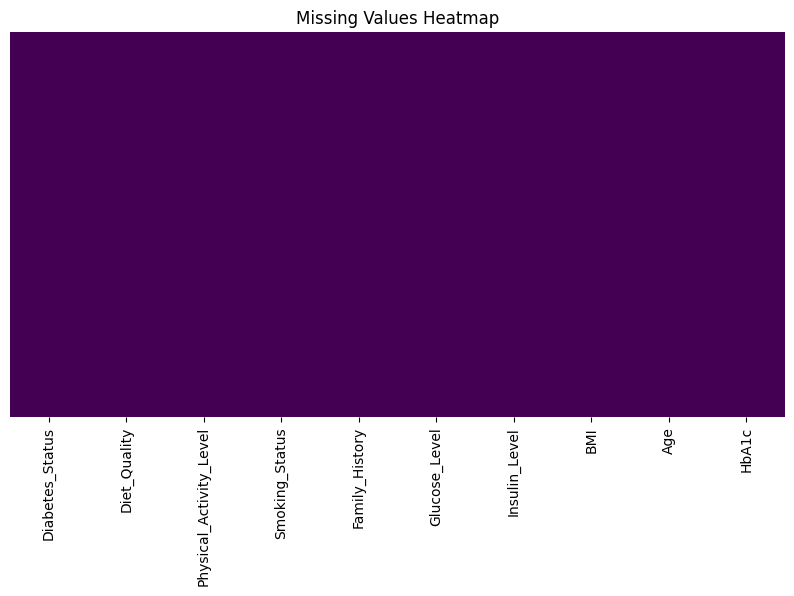

In [5]:
print("Dataset Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
columns_to_check = ["Glucose_Level", "Insulin_Level", "BMI"]

zero_counts = (df[columns_to_check] == 0).sum()
print("Zero values in critical columns:\n", zero_counts)

# Replace zero values with NaN
df[columns_to_check] = df[columns_to_check].replace(0, np.nan)

print("\nMissing values after replacing zeros:")
print(df.isnull().sum())


Zero values in critical columns:
 Glucose_Level    0
Insulin_Level    0
BMI              0
dtype: int64

Missing values after replacing zeros:
Diabetes_Status            0
Diet_Quality               0
Physical_Activity_Level    0
Smoking_Status             0
Family_History             0
Glucose_Level              0
Insulin_Level              0
BMI                        0
Age                        0
HbA1c                      0
dtype: int64


In [7]:
df['HbA1c'] = pd.to_numeric(df['HbA1c'], errors='coerce')


In [10]:
median_hba1c = df.groupby('Diabetes_Status')['HbA1c'].transform('median')
df['HbA1c'] = df['HbA1c'].fillna(median_hba1c)

In [12]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop('HbA1c', errors='ignore')  
print("Categorical Columns:\n", categorical_cols)


Categorical Columns:
 Index(['Diet_Quality', 'Physical_Activity_Level', 'Smoking_Status',
       'Family_History'],
      dtype='object')


In [13]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
print("\nDataset after encoding:")
print(df.head())

print("\nColumns in the dataset:")
print(df.columns)



Dataset after encoding:
   Diabetes_Status  Glucose_Level  Insulin_Level        BMI  Age      HbA1c  \
0                0      81.512847       1.637218  29.918798   22   6.434642   
1                0     107.371667      12.784553  30.160025   57   5.158362   
2                1     141.782099      28.219859  25.802436   35  10.056928   
3                1     186.950405      20.350001  36.065222   38   8.570821   
4                0      77.492305      17.500545  20.303162   20   5.794399   

   Diet_Quality_Excellent  Diet_Quality_Good  Diet_Quality_Poor  \
0                   False               True              False   
1                   False               True              False   
2                   False               True              False   
3                   False              False               True   
4                   False               True              False   

   Physical_Activity_Level_Low  Physical_Activity_Level_Moderate  \
0                        Fals

In [15]:
print("\nFinal Missing Values Check:")
print(df.isnull().sum())



Final Missing Values Check:
Diabetes_Status                     0
Glucose_Level                       0
Insulin_Level                       0
BMI                                 0
Age                                 0
HbA1c                               0
Diet_Quality_Excellent              0
Diet_Quality_Good                   0
Diet_Quality_Poor                   0
Physical_Activity_Level_Low         0
Physical_Activity_Level_Moderate    0
Smoking_Status_Former Smoker        0
Smoking_Status_Non-Smoker           0
Family_History_Yes                  0
dtype: int64


EDA

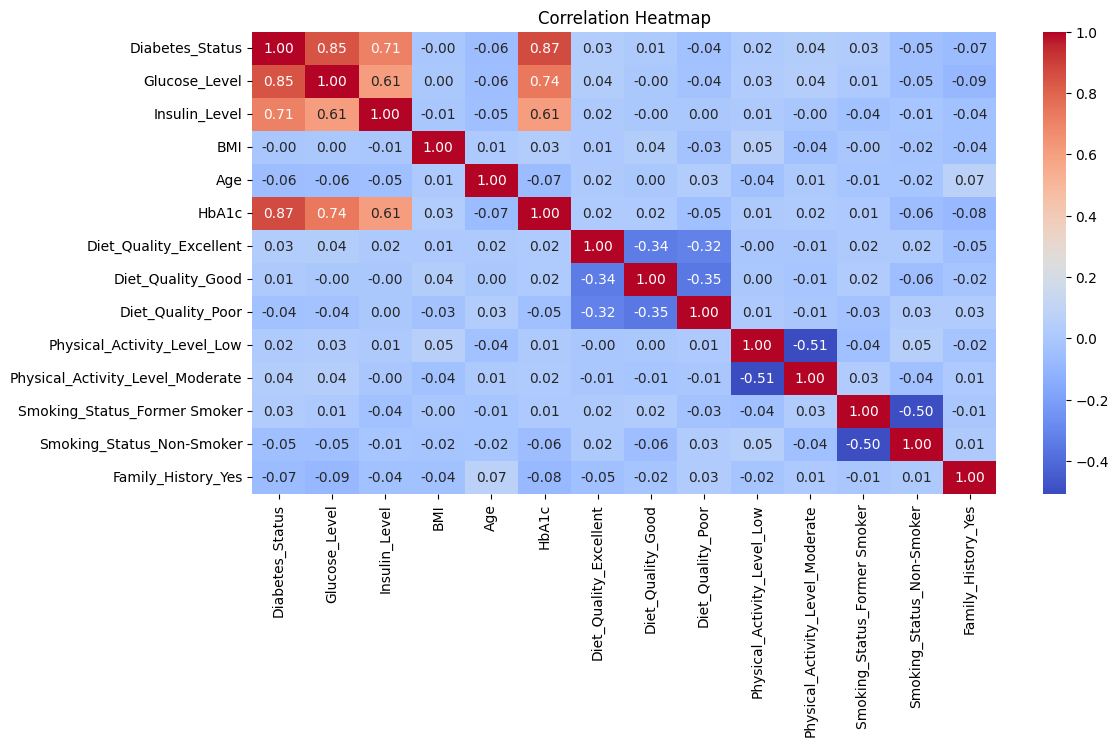

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


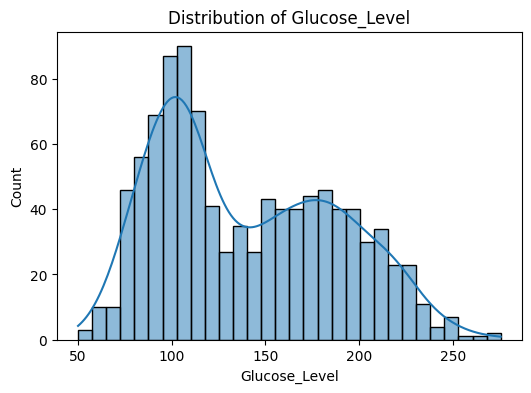

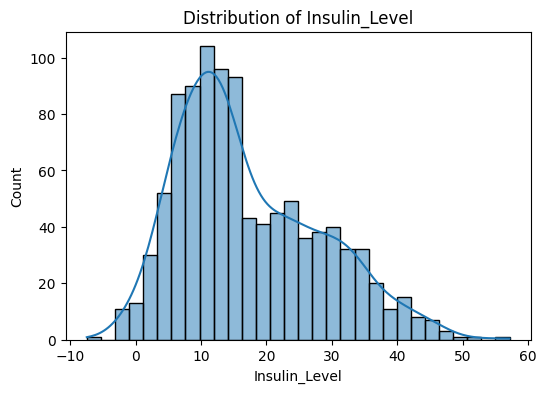

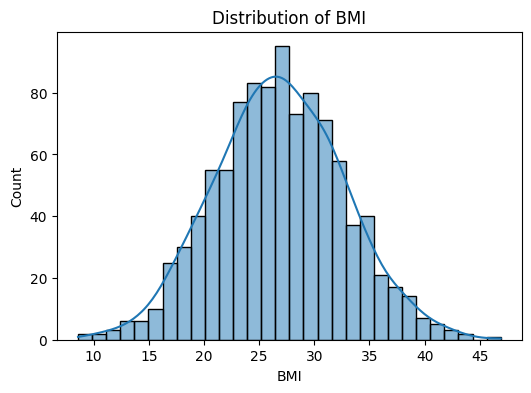

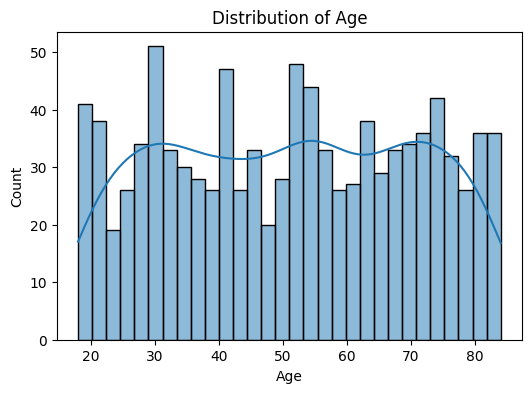

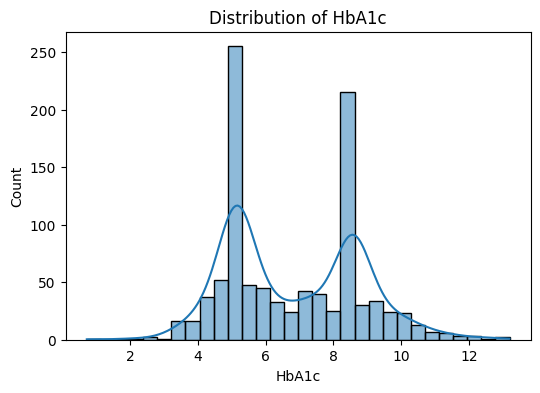

In [19]:
for col in ["Glucose_Level", "Insulin_Level", "BMI", "Age", "HbA1c"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


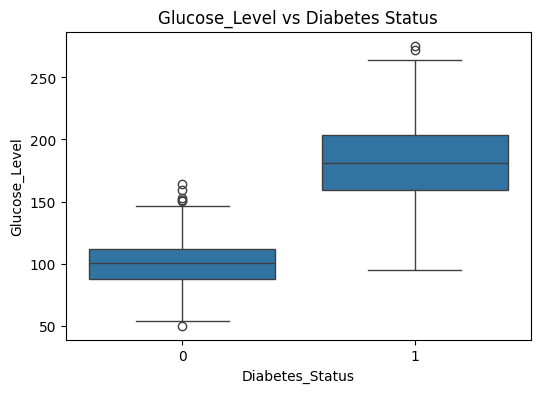

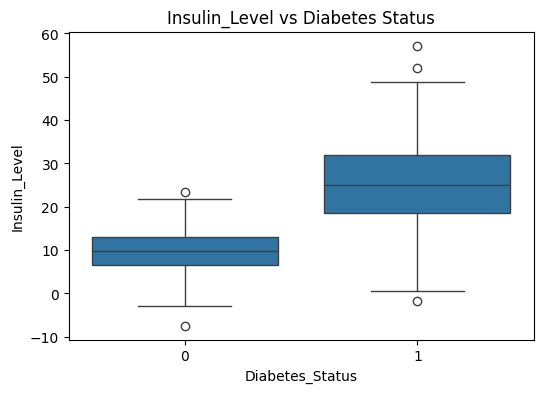

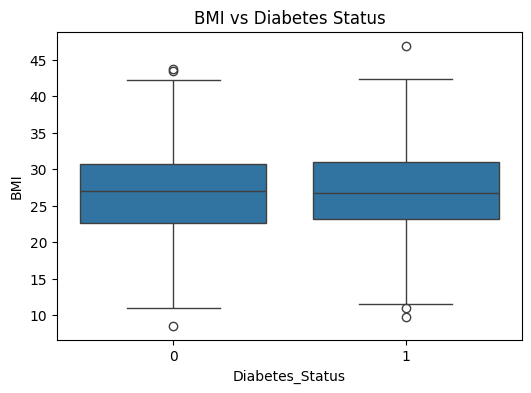

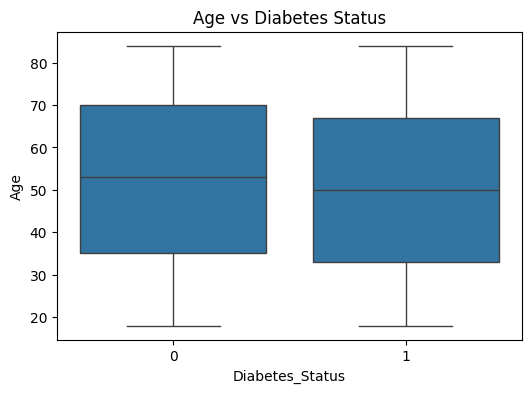

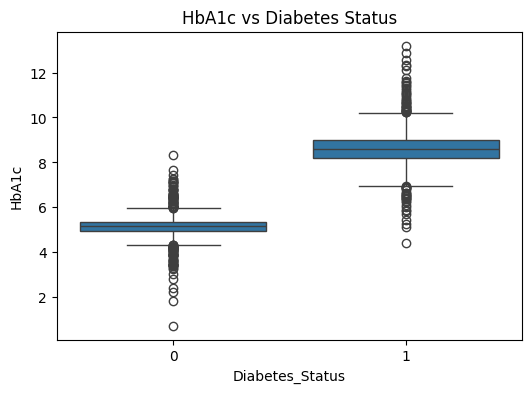

In [20]:
for col in ["Glucose_Level", "Insulin_Level", "BMI", "Age", "HbA1c"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df["Diabetes_Status"], y=df[col])
    plt.title(f"{col} vs Diabetes Status")
    plt.show()


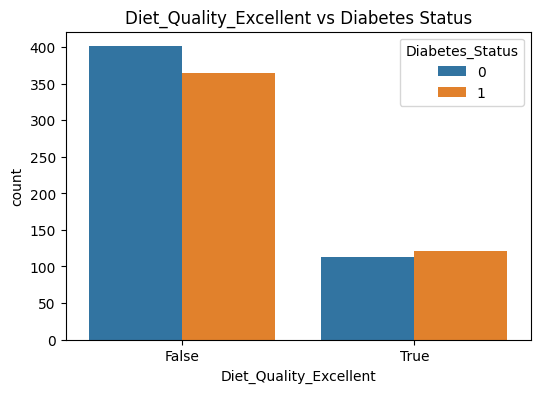

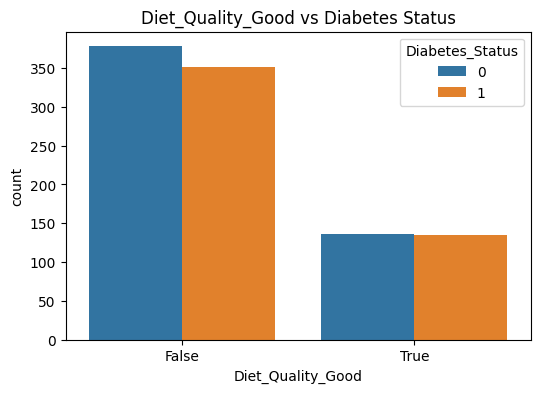

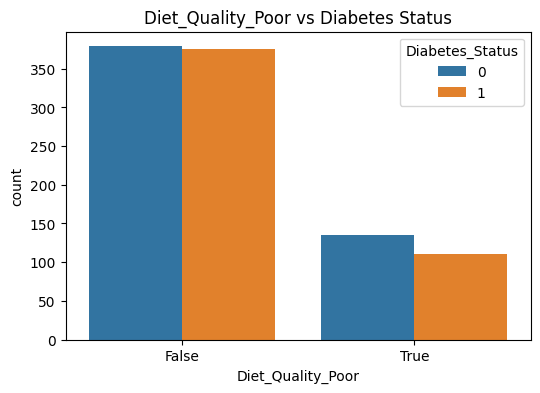

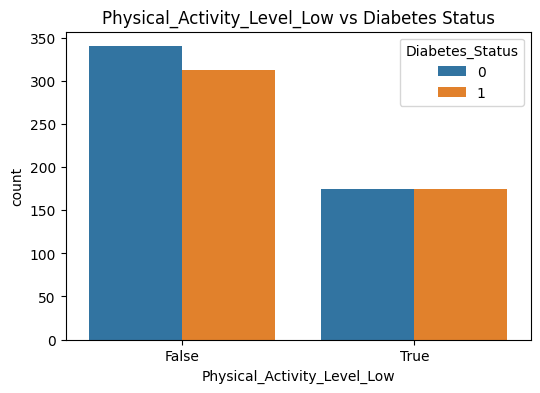

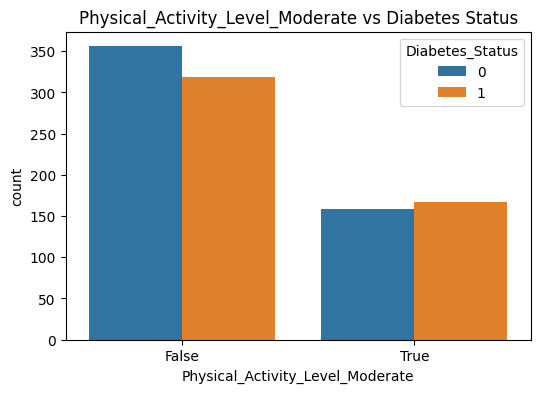

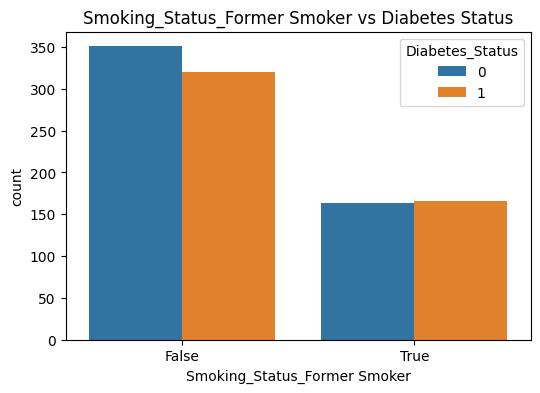

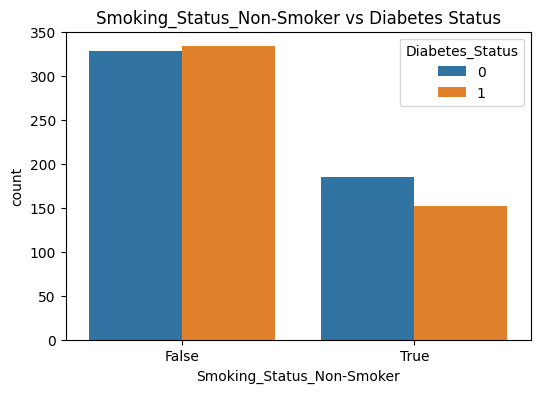

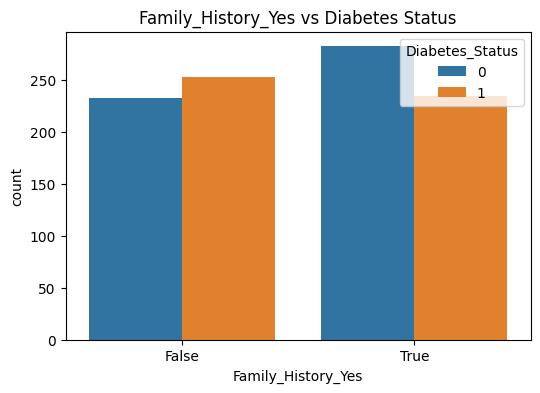

In [22]:
categorical_cols = ['Diet_Quality_Excellent', 'Diet_Quality_Good', 'Diet_Quality_Poor', 
                    'Physical_Activity_Level_Low', 'Physical_Activity_Level_Moderate', 
                    'Smoking_Status_Former Smoker', 'Smoking_Status_Non-Smoker', 'Family_History_Yes']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Diabetes_Status", data=df)
    plt.title(f"{col} vs Diabetes Status")
    plt.show()


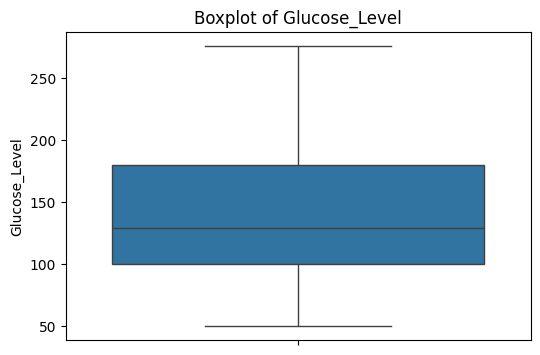

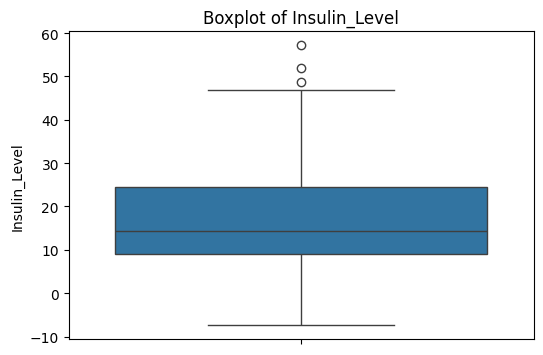

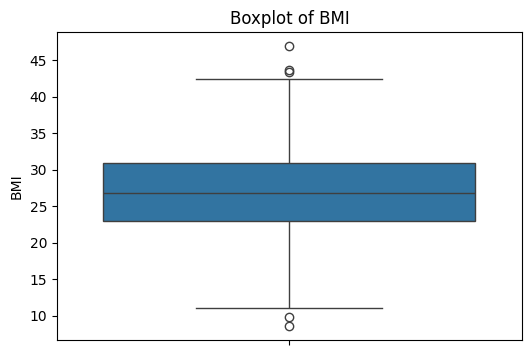

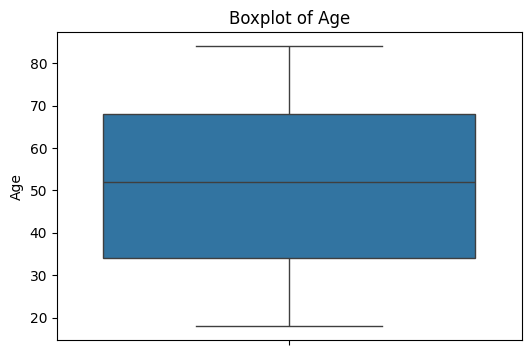

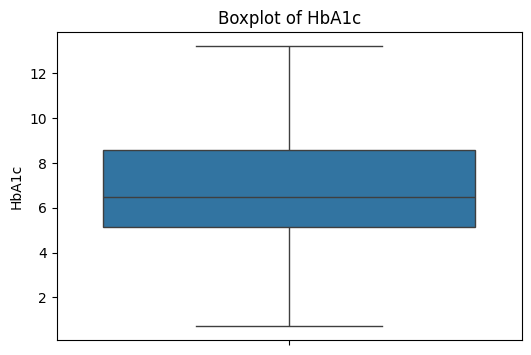

In [23]:
for col in ["Glucose_Level", "Insulin_Level", "BMI", "Age", "HbA1c"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


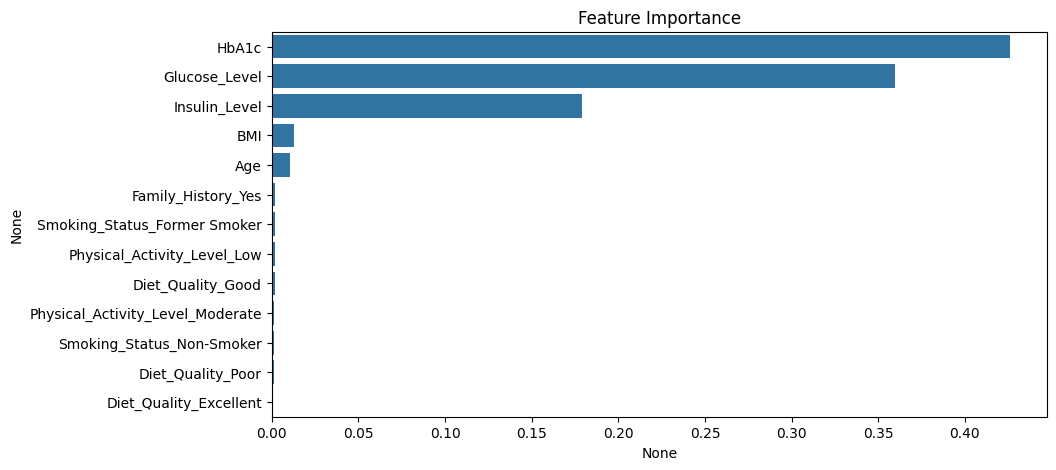

In [24]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Diabetes_Status", axis=1)
y = df["Diabetes_Status"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()
